In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision.gan import *

In [4]:
from fastai.vision import *
from fastai.callbacks import *

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [6]:
path = Path('/storage/bedroom')

In [7]:
path.ls()

[PosixPath('/storage/bedroom/models'),
 PosixPath('/storage/bedroom/e'),
 PosixPath('/storage/bedroom/c'),
 PosixPath('/storage/bedroom/b'),
 PosixPath('/storage/bedroom/1'),
 PosixPath('/storage/bedroom/8'),
 PosixPath('/storage/bedroom/7'),
 PosixPath('/storage/bedroom/3')]

# Wassertein GAN

## LSun bedroom data

In [6]:
#path = untar_data(URLs.LSUN_BEDROOMS)

We grab all the images withour creating a valid_ds, create random noise images and put the bedrooms images as targets.

In [5]:
def get_data(bs, size):
    return (GANItemList.from_folder(path, noise_sz=100)
               .split_none()
               .label_from_func(noop)
               .transform(tfms=[[crop_pad(size=size, row_pct=(0,1), col_pct=(0,1))], []], size=size, tfm_y=True)
               .databunch(bs=bs)
               .normalize(stats = [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y=True))

In [6]:
data = get_data(128, 64)

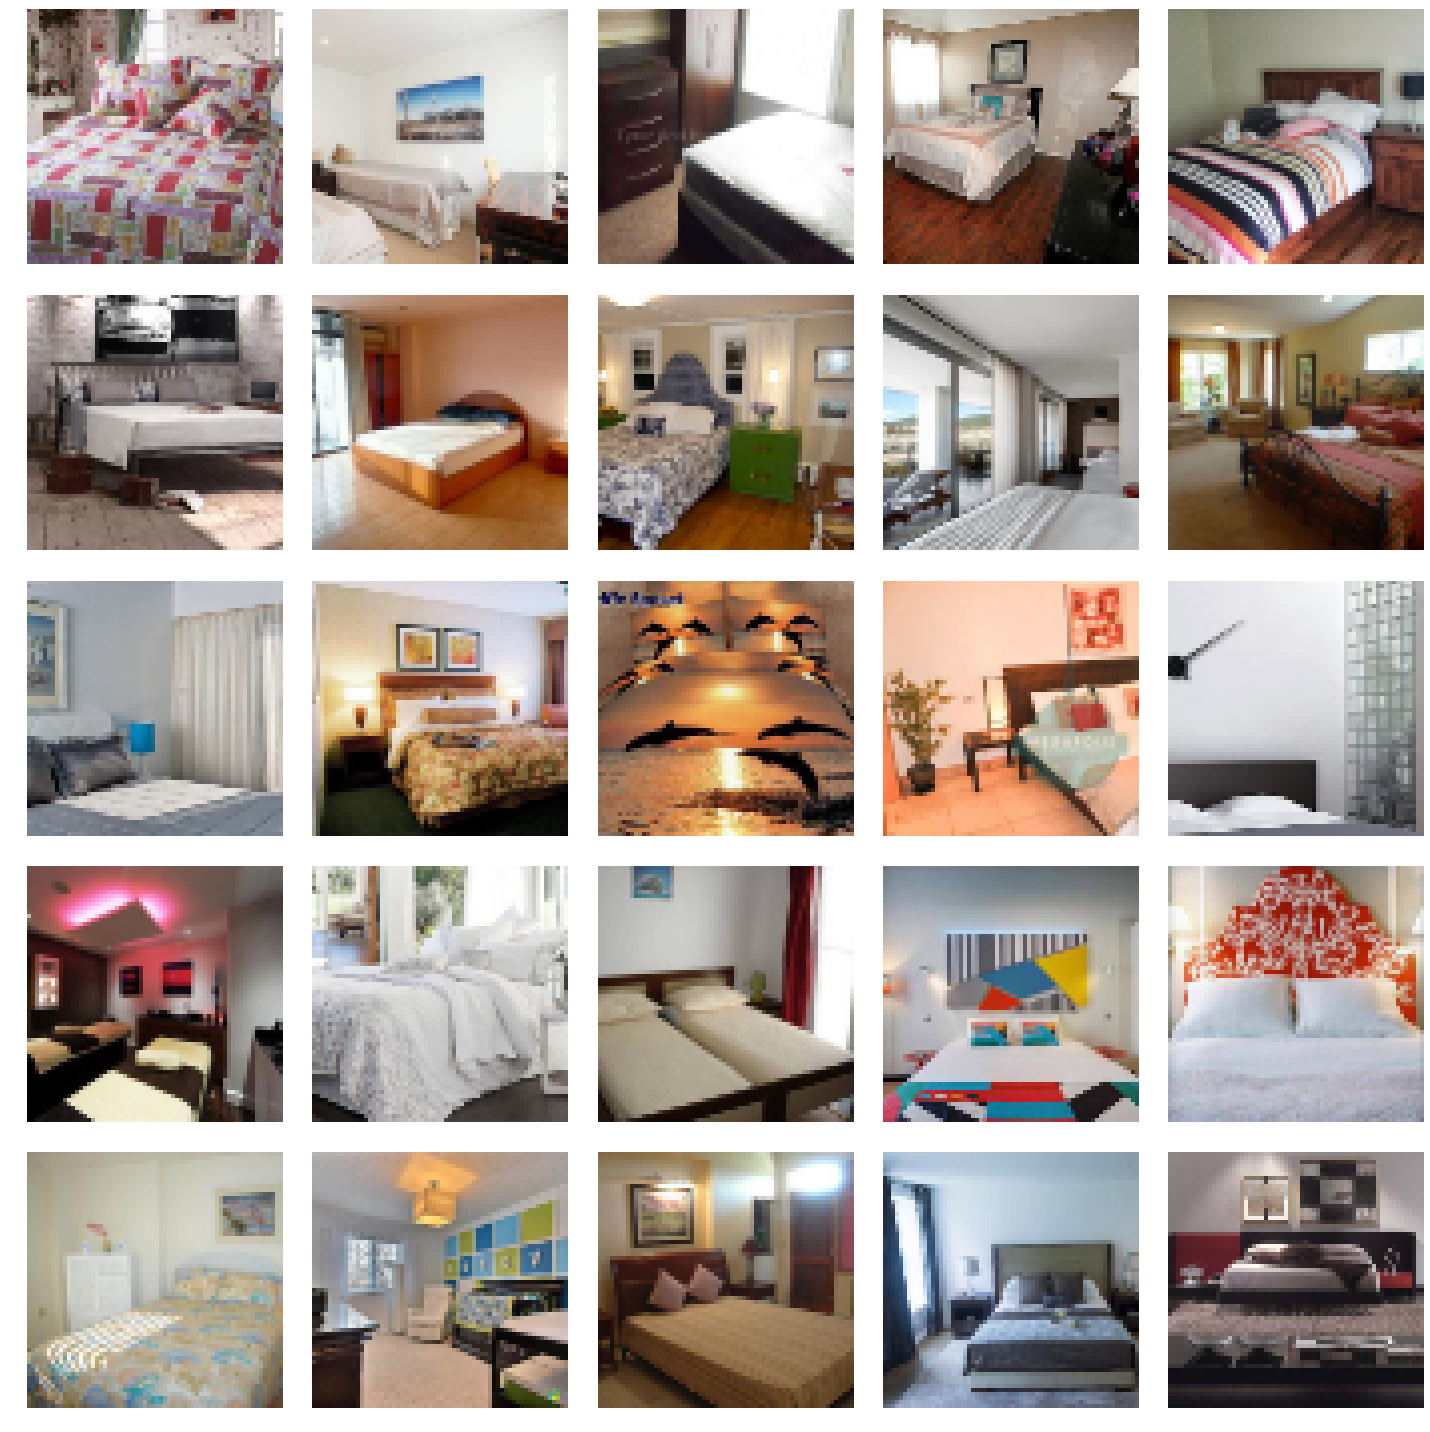

In [18]:
data.show_batch(rows=5)

## Models

In [9]:
generator = basic_generator(in_size=64, n_channels=3, n_extra_layers=1)
critic    = basic_critic   (in_size=64, n_channels=3, n_extra_layers=1)

In [10]:
learn = GANLearner.wgan(data, generator, critic, switch_eval=False,
                       opt_func = partial(optim.Adam, betas=(0.,0.99)), wd=0)

In [12]:
def do_fit(name, epochs, lrs):
    learn.fit(epochs, lrs)
    learn.save(name)
    learn.show_results(rows=3, imgsize=7)

epoch,train_loss,valid_loss,gen_loss,disc_loss,time
0,-0.701383,#na#,0.586828,-0.951978,03:44
1,-0.682858,#na#,0.547315,-0.931927,03:44


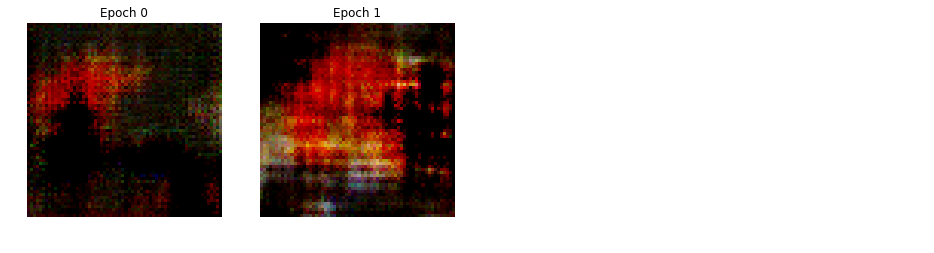

IndexError: index 0 is out of bounds for axis 0 with size 0

In [15]:
do_fit('1a', 2, 2e-4)

In [16]:
learn.gan_trainer.switch(gen_mode=True)

In [ ]:
learn.show_results(ds_type=DatasetType.Train, rows=16, figsize=(8,8))